In [1]:
# 크롤링 및 시각화를 위한 라이브러리 블러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [2]:
url = "http://www.statiz.co.kr/player.php?opt=1&sopt=0&name=%EC%98%A4%EC%A7%80%ED%99%98&birth=1990-03-12&re=0"
tables = pd.read_html(url)
print(len(tables),"개의 테이블이 있습니다")
df_list = pd.read_html(url)
df_list[1]

2 개의 테이블이 있습니다


연도   팀  나이   P     G   타 석   타 수  득 점   안 타  2 타  ...  희 타  희 비     비율  \
      연도   팀  나이   P     G   타 석   타 수  득 점   안 타  2 타  ...  희 타  희 비     타율   
0   2009  LG  19  SS     5    10     9    1     1    0  ...    0    0  0.111   
1   2010  LG  20  SS   125   417   352   59    85   13  ...    7    7  0.241   
2   2011  LG  21  SS    63   180   156   17    33    7  ...    3    1  0.212   
3   2012  LG  22  SS   133   540   462   66   115   22  ...    9    8  0.249   
4   2013  LG  23  SS   124   514   441   81   113   20  ...    7    3  0.256   
5   2014  LG  24  SS   113   464   397   72   104   20  ...    6    3  0.262   
6   2015  LG  25  SS   138   566   497   76   138   41  ...    3    3  0.278   
7   2016  LG  26  SS   121   472   393   73   110   14  ...    2    5  0.280   
8   2017  LG  27  SS   107   390   334   47    91   13  ...    1    5  0.272   
9   2018  LG  28  SS   144   617   533   93   148   26  ...   12    6  0.278   
10  2019  LG  29  SS   134   547   473   63   119   23  ...    7    3  0.252   
11  2020  LG  30  SS   141   591   527   95   158   41  ...    5    5  0.300   
12  2021  LG  31  SS   134   532   464   62   118   19  ...    4    5  0.254   
13  2022  LG  32  SS   142   569   494   75   133   16  ...    3    3  0.269   
14  2023  LG  33  SS   126   502   422   65   113   24  ...    4    4  0.268   
15    연도   팀  나이   P     G   타 석   타 수  득 점   안 타  2 타  ...  희 타  희 비     비율   
16    연도   팀  나이   P     G   타 석   타 수  득 점   안 타  2 타  ...  희 타  희 비     타율   
17    15  통산  통산  SS  1750  6911  5954  945  1579  299  ...   73   61  0.265   

                                        WAR*    WPA  
       출루     장타    OPS   wOBA   wRC+   WAR*    WPA  
0   0.200  0.111  0.311  0.167  -24.7  -0.09    NaN  
1   0.332  0.423  0.755  0.336   96.0   2.72    NaN  
2   0.299  0.295  0.594  0.283   64.4   0.36    NaN  
3   0.332  0.383  0.715  0.328  102.8   3.50    NaN  
4   0.347  0.399  0.746  0.346  102.6   3.91    NaN  
5   0.354  0.413  0.767  0.343   94.6   2.62   2.83  
6   0.357  0.443  0.800  0.357  110.3   4.44   2.40  
7   0.387  0.494  0.881  0.391  126.6   4.16   1.98  
8   0.363  0.407  0.770  0.346  101.2   2.14  -0.42  
9   0.354  0.396  0.750  0.329   89.4   2.83   2.62  
10  0.339  0.378  0.717  0.330  100.8   3.37   0.85  
11  0.362  0.461  0.823  0.368  119.9   4.41   1.21  
12  0.335  0.356  0.691  0.327   93.9   2.33  -0.53  
13  0.357  0.470  0.827  0.372  138.6   5.77   2.56  
14  0.372  0.396  0.767  0.360  121.9   3.89   1.95  
15     비율     비율     비율     비율     비율   WAR*    WPA  
16     출루     장타    OPS   wOBA   wRC+   WAR*    WPA  
17  0.351  0.413  0.764  0.347  105.4  46.34    NaN  

[18 rows x 31 columns]

In [3]:
selected_rows = df_list[1]
df= selected_rows.iloc[0:15]

In [4]:
# 두 번째 레벨의 컬럼명만 선택하여 사용
df.columns = df.columns.get_level_values(1)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
# 제목 행의 탭 제거
new_columns = [col.replace(" ", "") for col in df.columns]

# 데이터프레임의 열 이름 변경
df.columns = new_columns

# 변경된 데이터프레임 확인
df

,연도,팀,나이,P,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR*,WPA
0,2009,LG,19,SS,5,10,9,1,1,0,0,0,1,1,0,0,1,0,0,5,0,0,0,0.111,0.200,0.111,0.311,0.167,-24.7,-0.09,NaN
1,2010,LG,20,SS,125,417,352,59,85,13,6,13,149,61,13,2,44,7,0,137,1,7,7,0.241,0.332,0.423,0.755,0.336,96.0,2.72,NaN
2,2011,LG,21,SS,63,180,156,17,33,7,0,2,46,15,5,2,19,1,0,57,2,3,1,0.212,0.299,0.295,0.594,0.283,64.4,0.36,NaN
3,2012,LG,22,SS,133,540,462,66,115,22,2,12,177,53,23,14,55,6,4,122,6,9,8,0.249,0.332,0.383,0.715,0.328,102.8,3.50,NaN
4,2013,LG,23,SS,124,514,441,81,113,20,8,9,176,47,30,7,54,9,0,113,7,7,3,0.256,0.347,0.399,0.746,0.346,102.6,3.91,NaN
5,2014,LG,24,SS,113,464,397,72,104,20,8,8,164,56,28,12,51,7,2,102,8,6,3,0.262,0.354,0.413,0.767,0.343,94.6,2.62,2.83
6,2015,LG,25,SS,138,566,497,76,138,41,4,11,220,56,25,10,59,4,1,121,2,3,3,0.278,0.357,0.443,0.800,0.357,110.3,4.44,2.40
7,2016,LG,26,SS,121,472,393,73,110,14,5,20,194,78,17,9,65,7,0,97,7,2,5,0.280,0.387,0.494,0.881,0.391,126.6,4.16,1.98
8,2017,LG,27,SS,107,390,334,47,91,13,4,8,136,39,10,5,45,5,2,105,8,1,5,0.272,0.363,0.407,0.770,0.346,101.2,2.14,-0.42
9,2018,LG,28,SS,144,617,533,93,148,26,2,11,211,71,10,5,59,7,3,146,6,12,6,0.278,0.354,0.396,0.750,0.329,89.4,2.83,2.62


In [7]:
df = df.rename(columns={'P':'포지션','G':'경기'})

In [8]:
df.fillna(0, inplace=True)

In [9]:
import pandas as pd

# 연도, 팀, 포지션을 제외한 모든 열 선택
columns_to_convert = df.columns.difference(['팀', '포지션'])

# 선택된 열에만 숫자로 변환 적용
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# 변경된 데이터프레임 확인
df


,연도,팀,나이,포지션,경기,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR*,WPA
0,2009,LG,19,SS,5,10,9,1,1,0,0,0,1,1,0,0,1,0,0,5,0,0,0,0.111,0.200,0.111,0.311,0.167,-24.7,-0.09,0.00
1,2010,LG,20,SS,125,417,352,59,85,13,6,13,149,61,13,2,44,7,0,137,1,7,7,0.241,0.332,0.423,0.755,0.336,96.0,2.72,0.00
2,2011,LG,21,SS,63,180,156,17,33,7,0,2,46,15,5,2,19,1,0,57,2,3,1,0.212,0.299,0.295,0.594,0.283,64.4,0.36,0.00
3,2012,LG,22,SS,133,540,462,66,115,22,2,12,177,53,23,14,55,6,4,122,6,9,8,0.249,0.332,0.383,0.715,0.328,102.8,3.50,0.00
4,2013,LG,23,SS,124,514,441,81,113,20,8,9,176,47,30,7,54,9,0,113,7,7,3,0.256,0.347,0.399,0.746,0.346,102.6,3.91,0.00
5,2014,LG,24,SS,113,464,397,72,104,20,8,8,164,56,28,12,51,7,2,102,8,6,3,0.262,0.354,0.413,0.767,0.343,94.6,2.62,2.83
6,2015,LG,25,SS,138,566,497,76,138,41,4,11,220,56,25,10,59,4,1,121,2,3,3,0.278,0.357,0.443,0.800,0.357,110.3,4.44,2.40
7,2016,LG,26,SS,121,472,393,73,110,14,5,20,194,78,17,9,65,7,0,97,7,2,5,0.280,0.387,0.494,0.881,0.391,126.6,4.16,1.98
8,2017,LG,27,SS,107,390,334,47,91,13,4,8,136,39,10,5,45,5,2,105,8,1,5,0.272,0.363,0.407,0.770,0.346,101.2,2.14,-0.42
9,2018,LG,28,SS,144,617,533,93,148,26,2,11,211,71,10,5,59,7,3,146,6,12,6,0.278,0.354,0.396,0.750,0.329,89.4,2.83,2.62


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      15 non-null     int64  
 1   팀       15 non-null     object 
 2   나이      15 non-null     int64  
 3   포지션     15 non-null     object 
 4   경기      15 non-null     int64  
 5   타석      15 non-null     int64  
 6   타수      15 non-null     int64  
 7   득점      15 non-null     int64  
 8   안타      15 non-null     int64  
 9   2타      15 non-null     int64  
 10  3타      15 non-null     int64  
 11  홈런      15 non-null     int64  
 12  루타      15 non-null     int64  
 13  타점      15 non-null     int64  
 14  도루      15 non-null     int64  
 15  도실      15 non-null     int64  
 16  볼넷      15 non-null     int64  
 17  사구      15 non-null     int64  
 18  고4      15 non-null     int64  
 19  삼진      15 non-null     int64  
 20  병살      15 non-null     int64  
 21  희타      15 non-null     int64  
 22  희비  

In [11]:
df.drop(columns=['팀', '포지션'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      15 non-null     int64  
 1   나이      15 non-null     int64  
 2   경기      15 non-null     int64  
 3   타석      15 non-null     int64  
 4   타수      15 non-null     int64  
 5   득점      15 non-null     int64  
 6   안타      15 non-null     int64  
 7   2타      15 non-null     int64  
 8   3타      15 non-null     int64  
 9   홈런      15 non-null     int64  
 10  루타      15 non-null     int64  
 11  타점      15 non-null     int64  
 12  도루      15 non-null     int64  
 13  도실      15 non-null     int64  
 14  볼넷      15 non-null     int64  
 15  사구      15 non-null     int64  
 16  고4      15 non-null     int64  
 17  삼진      15 non-null     int64  
 18  병살      15 non-null     int64  
 19  희타      15 non-null     int64  
 20  희비      15 non-null     int64  
 21  타율      15 non-null     float64
 22  출루  

In [13]:
# df.to_csv('오지환성적.csv',encoding='utf-8')

In [14]:
df

,연도,나이,경기,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR*,WPA
0,2009,19,5,10,9,1,1,0,0,0,1,1,0,0,1,0,0,5,0,0,0,0.111,0.200,0.111,0.311,0.167,-24.7,-0.09,0.00
1,2010,20,125,417,352,59,85,13,6,13,149,61,13,2,44,7,0,137,1,7,7,0.241,0.332,0.423,0.755,0.336,96.0,2.72,0.00
2,2011,21,63,180,156,17,33,7,0,2,46,15,5,2,19,1,0,57,2,3,1,0.212,0.299,0.295,0.594,0.283,64.4,0.36,0.00
3,2012,22,133,540,462,66,115,22,2,12,177,53,23,14,55,6,4,122,6,9,8,0.249,0.332,0.383,0.715,0.328,102.8,3.50,0.00
4,2013,23,124,514,441,81,113,20,8,9,176,47,30,7,54,9,0,113,7,7,3,0.256,0.347,0.399,0.746,0.346,102.6,3.91,0.00
5,2014,24,113,464,397,72,104,20,8,8,164,56,28,12,51,7,2,102,8,6,3,0.262,0.354,0.413,0.767,0.343,94.6,2.62,2.83
6,2015,25,138,566,497,76,138,41,4,11,220,56,25,10,59,4,1,121,2,3,3,0.278,0.357,0.443,0.800,0.357,110.3,4.44,2.40
7,2016,26,121,472,393,73,110,14,5,20,194,78,17,9,65,7,0,97,7,2,5,0.280,0.387,0.494,0.881,0.391,126.6,4.16,1.98
8,2017,27,107,390,334,47,91,13,4,8,136,39,10,5,45,5,2,105,8,1,5,0.272,0.363,0.407,0.770,0.346,101.2,2.14,-0.42
9,2018,28,144,617,533,93,148,26,2,11,211,71,10,5,59,7,3,146,6,12,6,0.278,0.354,0.396,0.750,0.329,89.4,2.83,2.62


In [15]:
df1 = df[1:]

In [16]:
df1

,연도,나이,경기,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR*,WPA
1,2010,20,125,417,352,59,85,13,6,13,149,61,13,2,44,7,0,137,1,7,7,0.241,0.332,0.423,0.755,0.336,96.0,2.72,0.00
2,2011,21,63,180,156,17,33,7,0,2,46,15,5,2,19,1,0,57,2,3,1,0.212,0.299,0.295,0.594,0.283,64.4,0.36,0.00
3,2012,22,133,540,462,66,115,22,2,12,177,53,23,14,55,6,4,122,6,9,8,0.249,0.332,0.383,0.715,0.328,102.8,3.50,0.00
4,2013,23,124,514,441,81,113,20,8,9,176,47,30,7,54,9,0,113,7,7,3,0.256,0.347,0.399,0.746,0.346,102.6,3.91,0.00
5,2014,24,113,464,397,72,104,20,8,8,164,56,28,12,51,7,2,102,8,6,3,0.262,0.354,0.413,0.767,0.343,94.6,2.62,2.83
6,2015,25,138,566,497,76,138,41,4,11,220,56,25,10,59,4,1,121,2,3,3,0.278,0.357,0.443,0.800,0.357,110.3,4.44,2.40
7,2016,26,121,472,393,73,110,14,5,20,194,78,17,9,65,7,0,97,7,2,5,0.280,0.387,0.494,0.881,0.391,126.6,4.16,1.98
8,2017,27,107,390,334,47,91,13,4,8,136,39,10,5,45,5,2,105,8,1,5,0.272,0.363,0.407,0.770,0.346,101.2,2.14,-0.42
9,2018,28,144,617,533,93,148,26,2,11,211,71,10,5,59,7,3,146,6,12,6,0.278,0.354,0.396,0.750,0.329,89.4,2.83,2.62
10,2019,29,134,547,473,63,119,23,5,9,179,53,27,5,57,7,1,113,7,7,3,0.252,0.339,0.378,0.717,0.330,100.8,3.37,0.85


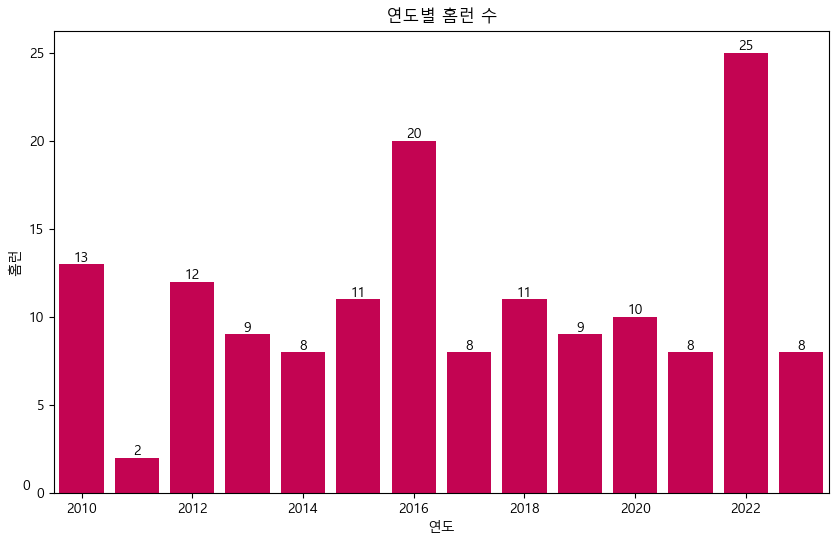

In [17]:
import matplotlib.pyplot as plt

# 데이터프레임의 인덱스를 다시 설정
df = df.reset_index(drop=True)

# 연도와 해당 연도의 홈런 수 데이터
years = df['연도']
home_runs = df['홈런']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 그래프 그리기
bars = plt.bar(years, home_runs, color='#C30452')

plt.xlabel('연도')
plt.ylabel('홈런')
plt.title('연도별 홈런 수')

# x축 범위를 2010.5년부터 2023.5년까지로 지정
plt.xlim(2009.5, 2023.5)

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()

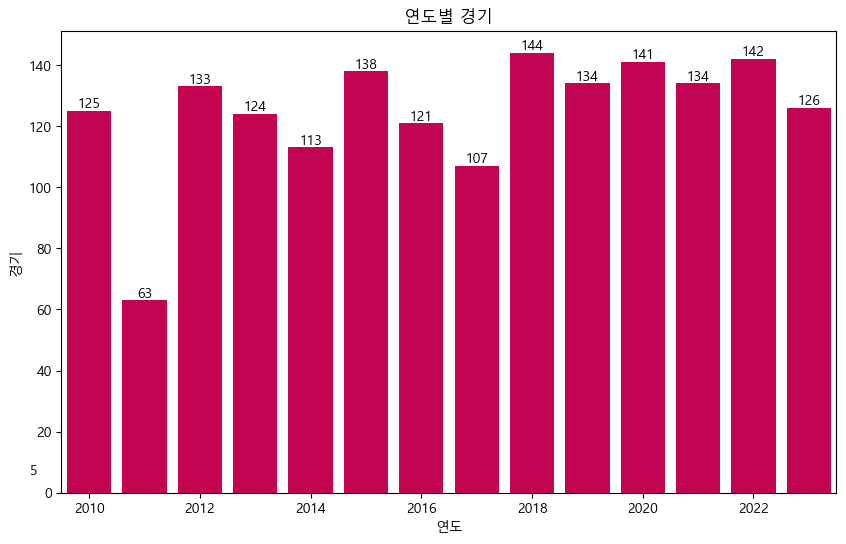

In [18]:
import matplotlib.pyplot as plt

# 데이터프레임의 인덱스를 다시 설정
df = df.reset_index(drop=True)

# 연도와 해당 연도의 경기 데이터
years = df['연도']
games = df['경기']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 그래프 그리기
bars = plt.bar(years, games, color='#C30452')

plt.xlabel('연도')
plt.ylabel('경기')
plt.title('연도별 경기')

# x축 범위를 2010.5년부터 2023.5년까지로 지정
plt.xlim(2009.5, 2023.5)

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()

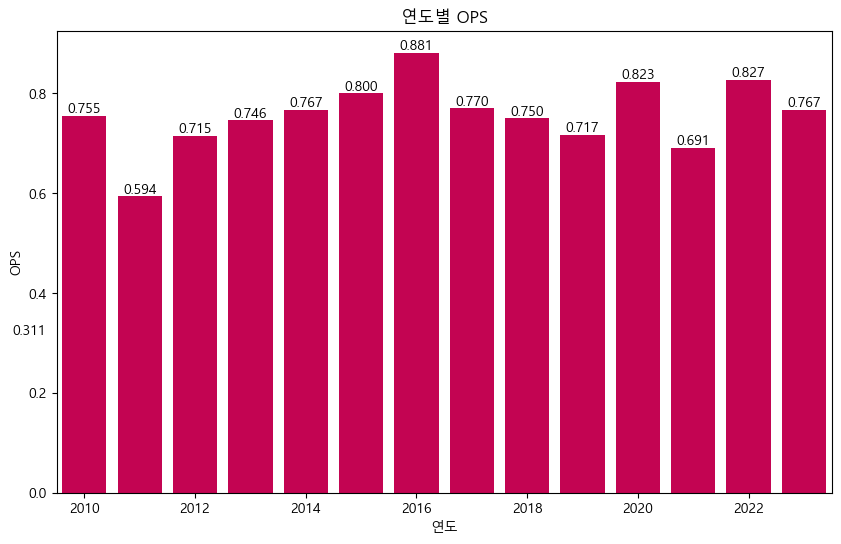

In [19]:
import matplotlib.pyplot as plt

# 데이터프레임의 인덱스를 다시 설정
df = df.reset_index(drop=True)

# 연도와 해당 연도의 OPS 데이터
years = df['연도']
OPS = df['OPS']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 그래프 그리기
bars = plt.bar(years, OPS, color='#C30452')

plt.xlabel('연도')
plt.ylabel('OPS')
plt.title('연도별 OPS')

# x축 범위를 2010.5년부터 2023.5년까지로 지정
plt.xlim(2009.5, 2023.5)

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.3f}'.format(height), ha='center', va='bottom')

plt.show()

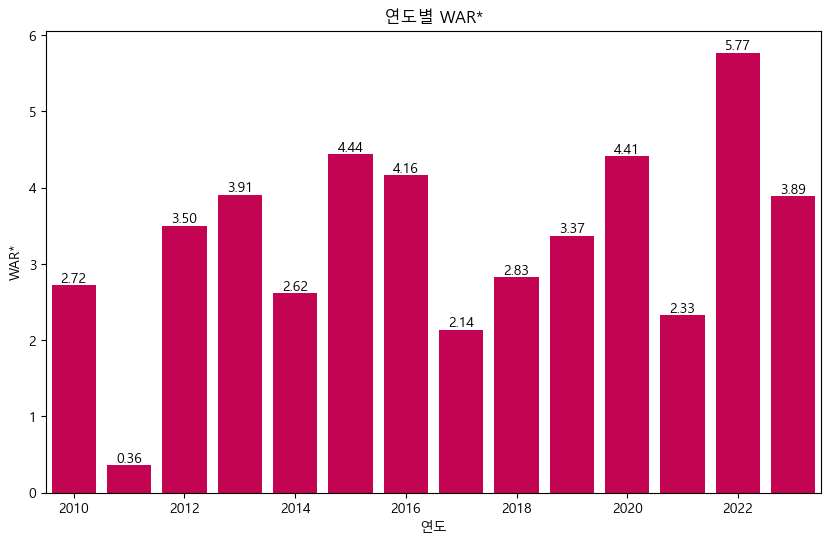

In [20]:
import matplotlib.pyplot as plt

# 데이터프레임의 인덱스를 다시 설정
df1 = df1.reset_index(drop=True)

# 연도와 해당 연도의 WAR* 데이터
years = df1['연도']
WAR = df1['WAR*']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 그래프 그리기
bars = plt.bar(years, WAR, color='#C30452')

plt.xlabel('연도')
plt.ylabel('WAR*')
plt.title('연도별 WAR*')

# x축 범위를 2009.5년부터 2023.5년까지로 지정
plt.xlim(2009.5, 2023.5)

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(height), ha='center', va='bottom')

plt.show()

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

df # 데이터프레임을 정의해야 함

# 필요한 항목 선택
selected_features = ['연도', '나이','경기', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '볼넷', '삼진', '타율','OPS','wRC+','WAR*']

# 2010~2023시즌에 해당하는 데이터 선택
data_10_23_seasons = df[(df['연도'] >= 2010) & (df['연도'] <= 2023)][selected_features]

# 특성과 타겟 변수 분할
X = data_10_23_seasons.drop('WAR*', axis=1)
y = data_10_23_seasons['WAR*']

# XGBoost 회귀 모델 생성 및 학습
model = XGBRegressor()
model.fit(data_10_23_seasons.drop('WAR*', axis=1), data_10_23_seasons['WAR*'])

# 2024시즌 데이터를 가진 선수에 대한 예측
data_for_prediction = df[df['연도'] == 2024][selected_features].drop('WAR*', axis=1)

# 만약 2024시즌 데이터가 없다면 평균값으로 채워넣기
if data_for_prediction.empty:
    # 2010~2023시즌까지의 평균값 계산
    average_10_23_seasons = df[(df['연도'] >= 2010) & (df['연도'] <= 2023)].mean().drop('연도')
    
    # 2024시즌 데이터에 평균값 적용
    data_for_prediction = pd.DataFrame([average_10_23_seasons], columns=selected_features[:-1])

# 모든 항목에 대한 예측값 출력
predicted_values = model.predict(data_for_prediction)
for feature, value in zip(selected_features[:-1], predicted_values):
    print(f'{feature}의 예측 WAR*: {value}')

연도의 예측 WAR*: 3.8898561000823975


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터프레임 정의
df

# 필요한 항목 선택
selected_features = ['연도', '나이','경기', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '볼넷', '삼진', '타율','OPS','wRC+','WAR*']

# 2010~2023시즌에 해당하는 데이터 선택
data_10_23_seasons = df[(df['연도'] >= 2010) & (df['연도'] <= 2023)][selected_features]

# 특성과 타겟 변수 분할
X = data_10_23_seasons.drop('WAR*', axis=1)
y = data_10_23_seasons['WAR*']

# LightGBM 회귀 모델 생성 및 학습
model = LGBMRegressor()
model.fit(data_10_23_seasons.drop('WAR*', axis=1), data_10_23_seasons['WAR*'])

# 2024시즌 데이터를 가진 선수에 대한 예측
data_for_prediction = df[df['연도'] == 2024][selected_features].drop('WAR*', axis=1)

# 만약 2024시즌 데이터가 없다면 평균값으로 채워넣기
if data_for_prediction.empty:
    # 2010~2023시즌까지의 평균값 계산
    average_10_23_seasons = df[(df['연도'] >= 2010) & (df['연도'] <= 2023)].mean().drop('연도')
    
    # 2024시즌 데이터에 평균값 적용
    data_for_prediction = pd.DataFrame([average_10_23_seasons], columns=selected_features[:-1])

# 모든 항목에 대한 예측값 출력
predicted_values = model.predict(data_for_prediction)
for feature, value in zip(selected_features[:-1], predicted_values):
    print(f'{feature}의 예측: {value}')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 0
[LightGBM] [Info] Start training from score 3.317857
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터프레임 정의
df

# 필요한 항목 선택
selected_features = ['연도', '나이','경기', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '볼넷', '삼진', '타율','OPS','wRC+','WAR*']

# 2010~2023시즌에 해당하는 데이터 선택
data_10_23_seasons = df[(df['연도'] >= 2010) & (df['연도'] <= 2023)][selected_features]

# 특성과 타겟 변수 분할
X = data_10_23_seasons.drop('OPS', axis=1)
y = data_10_23_seasons['OPS']

# LightGBM 회귀 모델 생성 및 학습
model = LGBMRegressor()
model.fit(data_10_23_seasons.drop('OPS', axis=1), data_10_23_seasons['OPS'])

# 2024시즌 데이터를 가진 선수에 대한 예측
data_for_prediction = df[df['연도'] == 2024][selected_features].drop('OPS', axis=1)

# 만약 2024시즌 데이터가 없다면 평균값으로 채워넣기
if data_for_prediction.empty:
    # 2010~2023시즌까지의 평균값 계산
    average_10_23_seasons = df[(df['연도'] >= 2010) & (df['연도'] <= 2023)].mean().drop('연도')
    
    # 2024시즌 데이터에 평균값 적용
    data_for_prediction = pd.DataFrame([average_10_23_seasons], columns=selected_features[:-1])

# 모든 항목에 대한 예측값 출력
predicted_values = model.predict(data_for_prediction)
for feature, value in zip(selected_features[:-1], predicted_values):
    print(f'{feature}의 예측 OPS: {value}')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 0
[LightGBM] [Info] Start training from score 0.757357
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [24]:
url = "http://www.statiz.co.kr/player.php?opt=1&sopt=0&name=%EC%98%A4%EC%A7%80%ED%99%98&birth=1990-03-12&re=2"
tables = pd.read_html(url)
print(len(tables),"개의 테이블이 있습니다")
df_list = pd.read_html(url)
df_list[1]

2 개의 테이블이 있습니다


연도   팀  나이   P    출장   선발      이닝   기회   자살   보살   실책    수비율   RF9  \
      연도   팀  나이   P    출장   선발      이닝   기회   자살   보살   실책    수비율   RF9   
0   2009  LG  19  SS     5  NaN     NaN  NaN  NaN  NaN  NaN    NaN   NaN   
1   2010  LG  20  SS   125  NaN     NaN  NaN  NaN  NaN  NaN    NaN   NaN   
2   2011  LG  21  SS    63  NaN     NaN  NaN  NaN  NaN  NaN    NaN   NaN   
3   2012  LG  22  SS   133  NaN     NaN  NaN  NaN  NaN  NaN    NaN   NaN   
4   2013  LG  23  SS   124  NaN     NaN  NaN  NaN  NaN  NaN    NaN   NaN   
5   2014  LG  24  SS   112  104   931.1  537  179  342   16  0.970  5.04   
6   2015  LG  25  SS   137  132  1152.2  685  219  451   15  0.978  5.23   
7   2016  LG  26  SS   119  112   990.0  562  180  365   17  0.970  4.96   
8   2017  LG  27  SS   106   95   830.2  397  132  254   11  0.972  4.18   
9   2018  LG  28  SS   143  142  1198.2  644  211  409   24  0.963  4.66   
10  2019  LG  29  SS   134  131  1101.0  628  214  402   12  0.981  5.04   
11  2020  LG  30  SS   141  136  1142.0  604  184  405   15  0.975  4.64   
12  2021  LG  31  SS   132  129  1060.2  546  174  359   13  0.976  4.52   
13  2022  LG  32  SS   142  137  1167.0  584  210  359   15  0.974  4.39   
14  2023  LG  33  SS   125  115  1010.2  465  176  275   14  0.970  4.02   
15    연도   팀  나이   P    출장   선발      이닝   기회   자살   보살   실책    수비율   RF9   
16    연도   팀  나이   P    출장   선발      이닝   기회   자살   보살   실책    수비율   RF9   
17    15  통산  통산  SS  1741  NaN     NaN  NaN  NaN  NaN  NaN    NaN   NaN   

      sFR                                          POS ADJ  RAA withADJ  \
      RNG    ARM    CS   BLK     E+    RAA   /133  POS ADJ  RAA withADJ   
0     NaN    NaN   NaN   NaN    NaN   0.00    NaN     0.13         0.45   
1     NaN    NaN   NaN   NaN    NaN   0.00    NaN     5.46        18.20   
2     NaN    NaN   NaN   NaN    NaN   0.00    NaN     2.20         7.35   
3     NaN    NaN   NaN   NaN    NaN   0.00    NaN     6.19        20.64   
4     NaN    NaN   NaN   NaN    NaN   0.00    NaN     6.41        21.35   
5   -1.12   0.00  0.00  0.00   0.00  -1.12  -1.44     5.46         4.34   
6   21.26   0.81  0.00  0.00   0.86  22.93  23.81     6.37        29.30   
7    3.43  -0.45  0.00  0.00   0.23   3.22   3.89     5.78         9.00   
8    6.04   0.00  0.00  0.00   0.49   6.53   9.40     4.63        11.15   
9    3.97   0.00  0.00  0.00  -0.95   3.02   3.02     6.87         9.90   
10  11.75   0.00  0.00  0.00   1.08  12.84  13.95     5.47        18.30   
11  12.31   0.00  0.00  0.00   0.43  12.73  13.35     6.24        18.98   
12  11.74   0.00  0.00  0.00   1.47  13.22  14.92     5.43        18.65   
13   4.97   0.00  0.00  0.00   1.63   6.60   6.77     5.87        12.47   
14   1.50   0.00  0.00  0.00   0.74   2.24   2.65     5.11         7.35   
15    sFR    sFR   sFR   sFR    sFR    sFR    sFR  POS ADJ  RAA withADJ   
16    RNG    ARM    CS   BLK     E+    RAA   /133  POS ADJ  RAA withADJ   
17    NaN    NaN   NaN   NaN    NaN  82.20    NaN    77.64       207.44   

    WAA w/oADJ  WAA withADJ  
    WAA w/oADJ  WAA withADJ  
0        0.000        0.042  
1        0.000        1.737  
2        0.000        0.750  
3        0.000        2.250  
4        0.000        2.142  
5       -0.098        0.381  
6        2.134        2.727  
7        0.284        0.793  
8        0.603        1.030  
9        0.271        0.888  
10       1.330        1.896  
11       1.198        1.786  
12       1.327        1.872  
13       0.674        1.275  
14       0.228        0.748  
15  WAA w/oADJ  WAA withADJ  
16  WAA w/oADJ  WAA withADJ  
17       7.950       20.316

In [25]:
selected_rows = df_list[1]
df2= selected_rows.iloc[5:15]

In [26]:
# 두 번째 레벨의 컬럼명만 선택하여 사용
df2.columns = df2.columns.get_level_values(1)

In [27]:
df2

,연도,팀,나이,P,출장,선발,이닝,기회,자살,보살,실책,수비율,RF9,RNG,ARM,CS,BLK,E+,RAA,/133,POS ADJ,RAA withADJ,WAA w/oADJ,WAA withADJ
5,2014,LG,24,SS,112,104,931.1,537,179,342,16,0.970,5.04,-1.12,0.00,0.00,0.00,0.00,-1.12,-1.44,5.46,4.34,-0.098,0.381
6,2015,LG,25,SS,137,132,1152.2,685,219,451,15,0.978,5.23,21.26,0.81,0.00,0.00,0.86,22.93,23.81,6.37,29.30,2.134,2.727
7,2016,LG,26,SS,119,112,990.0,562,180,365,17,0.970,4.96,3.43,-0.45,0.00,0.00,0.23,3.22,3.89,5.78,9.00,0.284,0.793
8,2017,LG,27,SS,106,95,830.2,397,132,254,11,0.972,4.18,6.04,0.00,0.00,0.00,0.49,6.53,9.40,4.63,11.15,0.603,1.030
9,2018,LG,28,SS,143,142,1198.2,644,211,409,24,0.963,4.66,3.97,0.00,0.00,0.00,-0.95,3.02,3.02,6.87,9.90,0.271,0.888
10,2019,LG,29,SS,134,131,1101.0,628,214,402,12,0.981,5.04,11.75,0.00,0.00,0.00,1.08,12.84,13.95,5.47,18.30,1.330,1.896
11,2020,LG,30,SS,141,136,1142.0,604,184,405,15,0.975,4.64,12.31,0.00,0.00,0.00,0.43,12.73,13.35,6.24,18.98,1.198,1.786
12,2021,LG,31,SS,132,129,1060.2,546,174,359,13,0.976,4.52,11.74,0.00,0.00,0.00,1.47,13.22,14.92,5.43,18.65,1.327,1.872
13,2022,LG,32,SS,142,137,1167.0,584,210,359,15,0.974,4.39,4.97,0.00,0.00,0.00,1.63,6.60,6.77,5.87,12.47,0.674,1.275
14,2023,LG,33,SS,125,115,1010.2,465,176,275,14,0.970,4.02,1.50,0.00,0.00,0.00,0.74,2.24,2.65,5.11,7.35,0.228,0.748


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 5 to 14
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   연도           10 non-null     object
 1   팀            10 non-null     object
 2   나이           10 non-null     object
 3   P            10 non-null     object
 4   출장           10 non-null     object
 5   선발           10 non-null     object
 6   이닝           10 non-null     object
 7   기회           10 non-null     object
 8   자살           10 non-null     object
 9   보살           10 non-null     object
 10  실책           10 non-null     object
 11  수비율          10 non-null     object
 12  RF9          10 non-null     object
 13  RNG          10 non-null     object
 14  ARM          10 non-null     object
 15  CS           10 non-null     object
 16  BLK          10 non-null     object
 17  E+           10 non-null     object
 18  RAA          10 non-null     object
 19  /133         10 non-null     ob

In [29]:
import pandas as pd

# 연도, 팀, 포지션을 제외한 모든 열 선택
columns_to_convert = df2.columns.difference(['팀', 'P'])

# 선택된 열에만 숫자로 변환 적용
df2[columns_to_convert] = df2[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# 변경된 데이터프레임 확인
df2


C:\Users\USER\AppData\Local\Temp\ipykernel_6920\1021023000.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[columns_to_convert] = df2[columns_to_convert].apply(pd.to_numeric, errors='coerce')


,연도,팀,나이,P,출장,선발,이닝,기회,자살,보살,실책,수비율,RF9,RNG,ARM,CS,BLK,E+,RAA,/133,POS ADJ,RAA withADJ,WAA w/oADJ,WAA withADJ
5,2014,LG,24,SS,112,104,931.1,537,179,342,16,0.970,5.04,-1.12,0.00,0.0,0.0,0.00,-1.12,-1.44,5.46,4.34,-0.098,0.381
6,2015,LG,25,SS,137,132,1152.2,685,219,451,15,0.978,5.23,21.26,0.81,0.0,0.0,0.86,22.93,23.81,6.37,29.30,2.134,2.727
7,2016,LG,26,SS,119,112,990.0,562,180,365,17,0.970,4.96,3.43,-0.45,0.0,0.0,0.23,3.22,3.89,5.78,9.00,0.284,0.793
8,2017,LG,27,SS,106,95,830.2,397,132,254,11,0.972,4.18,6.04,0.00,0.0,0.0,0.49,6.53,9.40,4.63,11.15,0.603,1.030
9,2018,LG,28,SS,143,142,1198.2,644,211,409,24,0.963,4.66,3.97,0.00,0.0,0.0,-0.95,3.02,3.02,6.87,9.90,0.271,0.888
10,2019,LG,29,SS,134,131,1101.0,628,214,402,12,0.981,5.04,11.75,0.00,0.0,0.0,1.08,12.84,13.95,5.47,18.30,1.330,1.896
11,2020,LG,30,SS,141,136,1142.0,604,184,405,15,0.975,4.64,12.31,0.00,0.0,0.0,0.43,12.73,13.35,6.24,18.98,1.198,1.786
12,2021,LG,31,SS,132,129,1060.2,546,174,359,13,0.976,4.52,11.74,0.00,0.0,0.0,1.47,13.22,14.92,5.43,18.65,1.327,1.872
13,2022,LG,32,SS,142,137,1167.0,584,210,359,15,0.974,4.39,4.97,0.00,0.0,0.0,1.63,6.60,6.77,5.87,12.47,0.674,1.275
14,2023,LG,33,SS,125,115,1010.2,465,176,275,14,0.970,4.02,1.50,0.00,0.0,0.0,0.74,2.24,2.65,5.11,7.35,0.228,0.748


In [30]:
df2.drop(columns=['팀', 'P'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6920\3901065641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['팀', 'P'], inplace=True)


In [31]:
df2

,연도,나이,출장,선발,이닝,기회,자살,보살,실책,수비율,RF9,RNG,ARM,CS,BLK,E+,RAA,/133,POS ADJ,RAA withADJ,WAA w/oADJ,WAA withADJ
5,2014,24,112,104,931.1,537,179,342,16,0.970,5.04,-1.12,0.00,0.0,0.0,0.00,-1.12,-1.44,5.46,4.34,-0.098,0.381
6,2015,25,137,132,1152.2,685,219,451,15,0.978,5.23,21.26,0.81,0.0,0.0,0.86,22.93,23.81,6.37,29.30,2.134,2.727
7,2016,26,119,112,990.0,562,180,365,17,0.970,4.96,3.43,-0.45,0.0,0.0,0.23,3.22,3.89,5.78,9.00,0.284,0.793
8,2017,27,106,95,830.2,397,132,254,11,0.972,4.18,6.04,0.00,0.0,0.0,0.49,6.53,9.40,4.63,11.15,0.603,1.030
9,2018,28,143,142,1198.2,644,211,409,24,0.963,4.66,3.97,0.00,0.0,0.0,-0.95,3.02,3.02,6.87,9.90,0.271,0.888
10,2019,29,134,131,1101.0,628,214,402,12,0.981,5.04,11.75,0.00,0.0,0.0,1.08,12.84,13.95,5.47,18.30,1.330,1.896
11,2020,30,141,136,1142.0,604,184,405,15,0.975,4.64,12.31,0.00,0.0,0.0,0.43,12.73,13.35,6.24,18.98,1.198,1.786
12,2021,31,132,129,1060.2,546,174,359,13,0.976,4.52,11.74,0.00,0.0,0.0,1.47,13.22,14.92,5.43,18.65,1.327,1.872
13,2022,32,142,137,1167.0,584,210,359,15,0.974,4.39,4.97,0.00,0.0,0.0,1.63,6.60,6.77,5.87,12.47,0.674,1.275
14,2023,33,125,115,1010.2,465,176,275,14,0.970,4.02,1.50,0.00,0.0,0.0,0.74,2.24,2.65,5.11,7.35,0.228,0.748


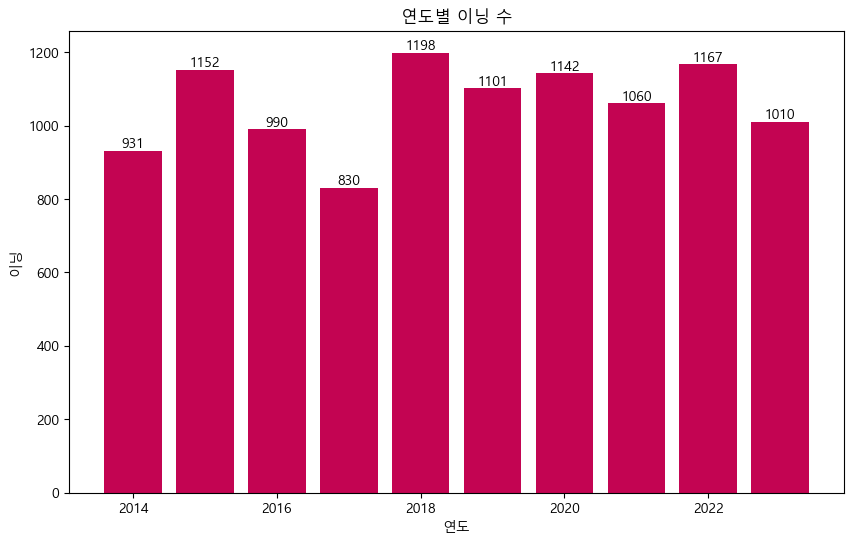

In [32]:
import matplotlib.pyplot as plt

# 데이터프레임의 인덱스를 다시 설정
df2 = df2.reset_index(drop=True)

# 연도와 해당 연도의 이닝 데이터
years = df2['연도']
innings = df2['이닝']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 그래프 그리기
bars = plt.bar(years, innings, color='#C30452')

plt.xlabel('연도')
plt.ylabel('이닝')
plt.title('연도별 이닝 수')

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()

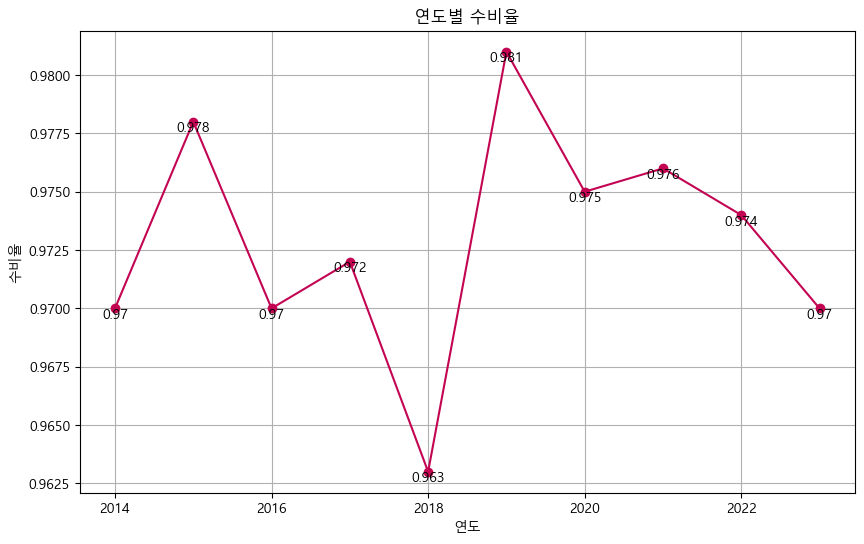

In [33]:
import matplotlib.pyplot as plt

# 데이터프레임의 인덱스를 다시 설정
df2 = df2.reset_index(drop=True)

# 연도와 해당 연도의 수비율 데이터
years = df2['연도']
fielding_rate = df2['수비율']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
plt.plot(years, fielding_rate, color='#C30452', marker='o', linestyle='-')

plt.xlabel('연도')
plt.ylabel('수비율')
plt.title('연도별 수비율')

plt.grid(True)  # 그리드 표시 추가

# 데이터 값 표시
for i, rate in enumerate(fielding_rate):
    plt.text(years[i], rate, str(rate), ha='center', va='top')

plt.show()

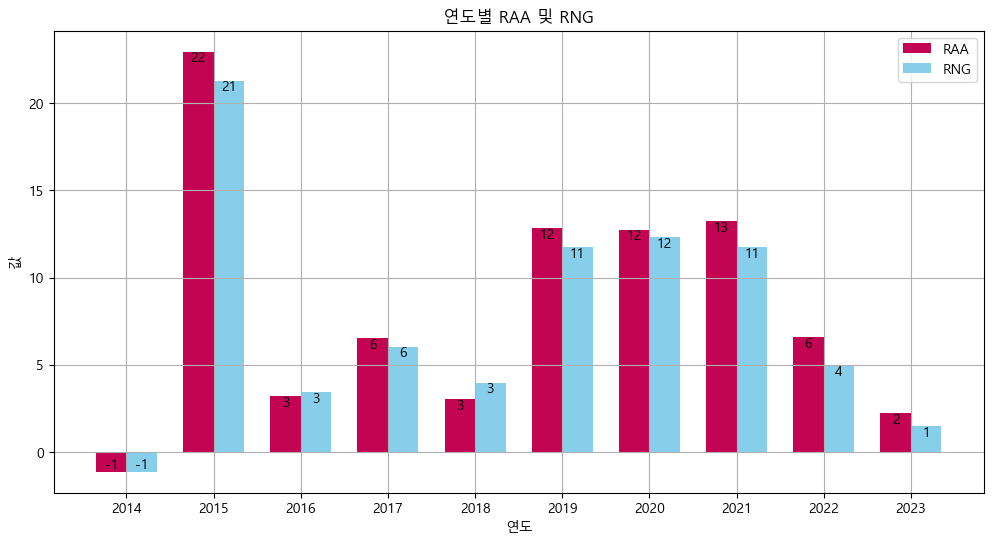

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임의 인덱스를 다시 설정
df2 = df2.reset_index(drop=True)

# 연도
years = df2['연도']
# RAA와 RNG 데이터
RAA = df2['RAA']
RNG = df2['RNG']

# 막대 너비
bar_width = 0.35
# 막대 위치 조정
index = np.arange(len(years))

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# RAA 막대 그래프 그리기
plt.bar(index, RAA, bar_width, color='#C30452', label='RAA')
# RNG 막대 그래프 그리기
plt.bar(index + bar_width, RNG, bar_width, color='skyblue', label='RNG')

plt.xlabel('연도')
plt.ylabel('값')
plt.title('연도별 RAA 및 RNG')

# x축 눈금과 라벨 설정
plt.xticks(index + bar_width / 2, years)

# 막대 위에 값 표시
for i, raa_value in enumerate(RAA):
    plt.text(i, raa_value, str(int(raa_value)), ha='center', va='bottom' if raa_value < 0 else 'top')
for i, rng_value in enumerate(RNG):
    plt.text(i + bar_width, rng_value, str(int(rng_value)), ha='center', va='bottom' if rng_value < 0 else 'top')

plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시 추가

plt.show()

In [41]:
df2.to_csv('오지환성적2.csv',encoding='utf-8')

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

df2
# 필요한 항목 선택
selected_features = ['연도', '나이', '출장', '선발', '실책', '수비율', 'RF9', 'RNG', 'RAA','이닝']

# 2010~2023시즌에 해당하는 데이터 선택
data_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)][selected_features]

# 특성과 타겟 변수 분할
X = data_14_23_seasons.drop('이닝', axis=1)
y = data_14_23_seasons['이닝']
# XGBoost 회귀 모델 생성 및 학습
model = XGBRegressor()
model.fit(X, y)

# 2024시즌 데이터를 가진 선수에 대한 예측
data_for_prediction = df2[df2['연도'] == 2024][selected_features].drop('이닝', axis=1)

# 만약 2024시즌 데이터가 없다면 평균값으로 채워넣기
if data_for_prediction.empty:
    # 2014~2023시즌까지의 평균값 계산
    average_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)].mean().drop('연도')
    
    # 2024시즌 데이터에 평균값 적용
    data_for_prediction = pd.DataFrame([average_14_23_seasons], columns=selected_features[:-1])

# 모든 항목에 대한 예측값 출력
predicted_values = model.predict(data_for_prediction)
for feature, value in zip(selected_features, predicted_values):
    print(f'{feature}의 예측 이닝: {value}')


연도의 예측 이닝: 1010.1994018554688


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

df2
# 필요한 항목 선택
selected_features = ['연도', '나이', '출장', '선발', '실책', '수비율', 'RF9', 'RNG', 'RAA','이닝']

# 2010~2023시즌에 해당하는 데이터 선택
data_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)][selected_features]

# 특성과 타겟 변수 분할
X = data_14_23_seasons.drop('이닝', axis=1)
y = data_14_23_seasons['이닝']
# XGBoost 회귀 모델 생성 및 학습
model = XGBRegressor()
model.fit(X, y)

# 2024시즌 데이터를 가진 선수에 대한 예측
data_for_prediction = df2[df2['연도'] == 2024][selected_features].drop('이닝', axis=1)

# 만약 2024시즌 데이터가 없다면 평균값으로 채워넣기
if data_for_prediction.empty:
    # 2014~2023시즌까지의 평균값 계산
    average_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)].mean().drop('연도')
    
    # 2024시즌 데이터에 평균값 적용
    data_for_prediction = pd.DataFrame([average_14_23_seasons], columns=selected_features[:-1])

# 모든 항목에 대한 예측값 출력
predicted_values = model.predict(data_for_prediction)
for feature, value in zip(selected_features, predicted_values):
    print(f'{feature}의 예측 이닝: {value}')


연도의 예측 이닝: 1010.1994018554688


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 경로 (실제 파일 경로에 맞게 수정)
df2

# 필요한 항목 선택
selected_features = ['수비율','연도', '나이', '출장', '선발', '실책' , 'RF9', 'RNG', 'RAA','이닝']

# 19~23시즌에 해당하는 데이터 선택
data_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)][selected_features]

# Define input features (X) and target variable (y)
X = data_14_23_seasons.drop('수비율', axis=1)
y = data_14_23_seasons['수비율']
# XGBoost 회귀 모델 생성 및 학습
model = XGBRegressor()
model.fit(data_14_23_seasons.drop('수비율', axis=1), data_14_23_seasons['수비율'])

# 24시즌 데이터가 없다면 평균값으로 채워넣기
if data_for_prediction.empty:
    # 19~23시즌까지의 평균값 계산
    average_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)].mean().drop('연도')
    
    # 24시즌 데이터에 평균값 적용
    data_for_prediction = pd.DataFrame([average_14_23_seasons], columns=selected_features)

# 전체 예측값 출력
predicted_values = model.predict(data_for_prediction)
result = dict(zip(selected_features, predicted_values))

# 한 번에 출력
for feature, value in result.items():
    print(f'예측 {feature}: {value}')

예측 수비율: 0.9775313138961792


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 경로 (실제 파일 경로에 맞게 수정)
df2

# 필요한 항목 선택 ('수비율'을 'RNG'으로 변경)
selected_features = ['RNG', '연도', '나이', '출장', '선발', '실책', 'RF9', 'RAA', '이닝']

# 19~23시즌에 해당하는 데이터 선택
data_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)][selected_features]

# Define input features (X) and target variable (y)
X = data_14_23_seasons.drop('RNG', axis=1)
y = data_14_23_seasons['RNG']

# XGBoost 회귀 모델 생성 및 학습
model = XGBRegressor()
model.fit(X, y)

# 24시즌 데이터가 없다면 평균값으로 채워넣기
if df2[df2['연도'] == 2024].empty:
    # 19~23시즌까지의 평균값 계산
    average_14_23_seasons = data_14_23_seasons.mean()
    
    # 24시즌 데이터에 평균값 적용
    data_for_prediction = pd.DataFrame([average_14_23_seasons.drop('RNG')], columns=[col for col in selected_features if col != 'RNG'])

    # 전체 예측값 출력
    predicted_values = model.predict(data_for_prediction)
    result = dict(zip(selected_features, predicted_values))

    # 예측 결과 출력
    for feature, value in result.items():
        print(f'예측 {feature}: {value}')
else:
    print("2024 시즌 데이터가 이미 존재합니다.")

예측 RNG: 4.971120357513428


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 경로 (실제 파일 경로에 맞게 수정)
df2

# 필요한 항목 선택 ('수비율'을 'RAA'로 변경)
selected_features = ['RAA', '연도', '나이', '출장', '선발', '실책', 'RF9', '이닝']

# 19~23시즌에 해당하는 데이터 선택
data_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)][selected_features]

# Define input features (X) and target variable (y)
X = data_14_23_seasons.drop('RAA', axis=1)
y = data_14_23_seasons['RAA']

# XGBoost 회귀 모델 생성 및 학습
model = XGBRegressor()
model.fit(X, y)

# 24시즌 데이터가 없다면 평균값으로 채워넣기
if df2[df2['연도'] == 2024].empty:
    # 19~23시즌까지의 평균값 계산
    average_14_23_seasons = data_14_23_seasons.mean()
    
    # 24시즌 데이터에 평균값 적용
    data_for_prediction = pd.DataFrame([average_14_23_seasons.drop('RAA')], columns=[col for col in selected_features if col != 'RAA'])

    # 전체 예측값 출력
    predicted_values = model.predict(data_for_prediction)
    result = dict(zip(selected_features, predicted_values))

    # 예측 결과 출력
    for feature, value in result.items():
        print(f'예측 {feature}: {value}')
else:
    print("2024 시즌 데이터가 이미 존재합니다.")

예측 RAA: 6.76764440536499


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 경로 (실제 파일 경로에 맞게 수정)
df2

# 필요한 항목 선택 ('수비율'을 'RAA'로 변경)
selected_features_raa = ['RAA', '연도', '나이', '출장', '선발', '실책', 'RF9', '이닝']

# 필요한 항목 선택 ('수비율'을 'RNG'으로 변경)
selected_features_rng = ['RNG', '연도', '나이', '출장', '선발', '실책', 'RF9', 'RAA', '이닝']

# 19~23시즌에 해당하는 데이터 선택
data_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)]

# Define input features and target variables for RAA
X_raa = data_14_23_seasons[selected_features_raa].drop('RAA', axis=1)
y_raa = data_14_23_seasons['RAA']

# Define input features and target variables for RNG
X_rng = data_14_23_seasons[selected_features_rng].drop('RNG', axis=1)
y_rng = data_14_23_seasons['RNG']

# XGBoost 회귀 모델 생성 및 학습 (RAA)
model_raa = XGBRegressor()
model_raa.fit(X_raa, y_raa)

# XGBoost 회귀 모델 생성 및 학습 (RNG)
model_rng = XGBRegressor()
model_rng.fit(X_rng, y_rng)

# 24시즌 데이터가 없다면 평균값으로 채워넣기
if df2[df2['연도'] == 2024].empty:
    # 19~23시즌까지의 평균값 계산
    average_14_23_seasons = data_14_23_seasons.mean()

    # 24시즌 데이터에 평균값 적용
    data_for_prediction_raa = pd.DataFrame([average_14_23_seasons.drop('RAA')], columns=[col for col in selected_features_raa if col != 'RAA'])
    data_for_prediction_rng = pd.DataFrame([average_14_23_seasons.drop('RNG')], columns=[col for col in selected_features_rng if col != 'RNG'])

    # 전체 예측값 출력 (RAA)
    predicted_values_raa = model_raa.predict(data_for_prediction_raa)
    result_raa = dict(zip(selected_features_raa, predicted_values_raa))

    # 전체 예측값 출력 (RNG)
    predicted_values_rng = model_rng.predict(data_for_prediction_rng)
    result_rng = dict(zip(selected_features_rng, predicted_values_rng))

    # 예측 결과 출력
    print("예측 결과 (RAA):")
    for feature, value in result_raa.items():
        print(f'예측 {feature}: {value}')

    print("\n예측 결과 (RNG):")
    for feature, value in result_rng.items():
        print(f'예측 {feature}: {value}')

else:
    print("2024 시즌 데이터가 이미 존재합니다.")

예측 결과 (RAA):
예측 RAA: 6.76764440536499

예측 결과 (RNG):
예측 RNG: 4.971120357513428


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 경로 (실제 파일 경로에 맞게 수정)
df2

# 필요한 항목 선택 ('수비율'을 'RAA'로 변경)
selected_features_raa = ['RAA', '연도', '나이', '출장', '선발', '실책', 'RF9', '이닝']

# 필요한 항목 선택 ('수비율'을 'RNG'으로 변경)
selected_features_rng = ['RNG', '연도', '나이', '출장', '선발', '실책', 'RF9', 'RAA', '이닝']

# 필요한 항목 선택 ('수비율'을 추가)
selected_features_defense = ['수비율', '연도', '나이', '출장', '선발', '실책', 'RF9', 'RAA', '이닝']

# 19~23시즌에 해당하는 데이터 선택
data_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)]

# Define input features and target variables for RAA
X_raa = data_14_23_seasons[selected_features_raa].drop('RAA', axis=1)
y_raa = data_14_23_seasons['RAA']

# Define input features and target variables for RNG
X_rng = data_14_23_seasons[selected_features_rng].drop('RNG', axis=1)
y_rng = data_14_23_seasons['RNG']

# Define input features and target variables for Defense
X_defense = data_14_23_seasons[selected_features_defense].drop('수비율', axis=1)
y_defense = data_14_23_seasons['수비율']

# XGBoost 회귀 모델 생성 및 학습 (RAA)
model_raa = XGBRegressor()
model_raa.fit(X_raa, y_raa)

# XGBoost 회귀 모델 생성 및 학습 (RNG)
model_rng = XGBRegressor()
model_rng.fit(X_rng, y_rng)

# XGBoost 회귀 모델 생성 및 학습 (Defense)
model_defense = XGBRegressor()
model_defense.fit(X_defense, y_defense)

# 24시즌 데이터가 없다면 평균값으로 채워넣기
if df2[df2['연도'] == 2024].empty:
    # 19~23시즌까지의 평균값 계산
    average_14_23_seasons = data_14_23_seasons.mean()

    # 24시즌 데이터에 평균값 적용
    data_for_prediction_raa = pd.DataFrame([average_14_23_seasons.drop('RAA')], columns=[col for col in selected_features_raa if col != 'RAA'])
    data_for_prediction_rng = pd.DataFrame([average_14_23_seasons.drop('RNG')], columns=[col for col in selected_features_rng if col != 'RNG'])
    data_for_prediction_defense = pd.DataFrame([average_14_23_seasons.drop('수비율')], columns=[col for col in selected_features_defense if col != '수비율'])

    # 전체 예측값 출력 (RAA)
    predicted_values_raa = model_raa.predict(data_for_prediction_raa)
    result_raa = dict(zip(selected_features_raa, predicted_values_raa))

    # 전체 예측값 출력 (RNG)
    predicted_values_rng = model_rng.predict(data_for_prediction_rng)
    result_rng = dict(zip(selected_features_rng, predicted_values_rng))

    # 전체 예측값 출력 (Defense)
    predicted_values_defense = model_defense.predict(data_for_prediction_defense)
    result_defense = dict(zip(selected_features_defense, predicted_values_defense))

    # 예측 결과 출력
    print("예측 결과 (RAA):")
    for feature, value in result_raa.items():
        print(f'예측 {feature}: {value}')

    print("\n예측 결과 (RNG):")
    for feature, value in result_rng.items():
        print(f'예측 {feature}: {value}')

    print("\n예측 결과 (Defense):")
    for feature, value in result_defense.items():
        print(f'예측 {feature}: {value}')

else:
    print("2024 시즌 데이터가 이미 존재합니다.")

예측 결과 (RAA):
예측 RAA: 6.76764440536499

예측 결과 (RNG):
예측 RNG: 4.971120357513428

예측 결과 (Defense):
예측 수비율: 0.9775313138961792


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 경로 (실제 파일 경로에 맞게 수정)
df2

# 필요한 항목 선택 ('수비율'을 'RAA'로 변경)
selected_features_raa = ['RAA', '연도', '나이', '출장', '선발', '실책', 'RF9', '이닝']

# 필요한 항목 선택 ('수비율'을 'RNG'으로 변경)
selected_features_rng = ['RNG', '연도', '나이', '출장', '선발', '실책', 'RF9', 'RAA', '이닝']

# 필요한 항목 선택 ('수비율'을 추가)
selected_features_defense = ['수비율', '연도', '나이', '출장', '선발', '실책', 'RF9', 'RAA', '이닝']

# 19~23시즌에 해당하는 데이터 선택
data_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)]

# Define input features and target variables for RAA
X_raa = data_14_23_seasons[selected_features_raa].drop('RAA', axis=1)
y_raa = data_14_23_seasons['RAA']

# Define input features and target variables for RNG
X_rng = data_14_23_seasons[selected_features_rng].drop('RNG', axis=1)
y_rng = data_14_23_seasons['RNG']

# Define input features and target variables for Defense
X_defense = data_14_23_seasons[selected_features_defense].drop('수비율', axis=1)
y_defense = data_14_23_seasons['수비율']

# XGBoost 회귀 모델 생성 및 학습 (RAA)
model_raa = XGBRegressor()
model_raa.fit(X_raa, y_raa)

# XGBoost 회귀 모델 생성 및 학습 (RNG)
model_rng = XGBRegressor()
model_rng.fit(X_rng, y_rng)

# XGBoost 회귀 모델 생성 및 학습 (Defense)
model_defense = XGBRegressor()
model_defense.fit(X_defense, y_defense)

# 24시즌 데이터가 없다면 평균값으로 채워넣기
if df2[df2['연도'] == 2024].empty:
    # 19~23시즌까지의 평균값 계산
    average_14_23_seasons = data_14_23_seasons.mean()

    # 24시즌 데이터에 평균값 적용
    data_for_prediction_raa = pd.DataFrame([average_14_23_seasons.drop('RAA')], columns=[col for col in selected_features_raa if col != 'RAA'])
    data_for_prediction_rng = pd.DataFrame([average_14_23_seasons.drop('RNG')], columns=[col for col in selected_features_rng if col != 'RNG'])
    data_for_prediction_defense = pd.DataFrame([average_14_23_seasons.drop('수비율')], columns=[col for col in selected_features_defense if col != '수비율'])

    # 전체 예측값 출력 (RAA)
    predicted_values_raa = model_raa.predict(data_for_prediction_raa)
    result_raa = dict(zip(selected_features_raa, predicted_values_raa))

    # 전체 예측값 출력 (RNG)
    predicted_values_rng = model_rng.predict(data_for_prediction_rng)
    result_rng = dict(zip(selected_features_rng, predicted_values_rng))

    # 전체 예측값 출력 (Defense)
    predicted_values_defense = model_defense.predict(data_for_prediction_defense)
    result_defense = dict(zip(selected_features_defense, predicted_values_defense))

    # 예측 결과 출력
    print("예측 결과 (RAA):")
    for feature, value in result_raa.items():
        print(f'예측 {feature}: {value}')

    print("\n예측 결과 (RNG):")
    for feature, value in result_rng.items():
        print(f'예측 {feature}: {value}')

    print("\n예측 결과 (Defense):")
    for feature, value in result_defense.items():
        print(f'예측 {feature}: {value}')

    # 전체 예측값 출력 (이닝)
    predicted_values_inning = average_14_23_seasons['이닝']
    print(f"\n전체 예측값 출력 (이닝): {predicted_values_inning}")

else:
    print("2024 시즌 데이터가 이미 존재합니다.")

예측 결과 (RAA):
예측 RAA: 6.76764440536499

예측 결과 (RNG):
예측 RNG: 4.971120357513428

예측 결과 (Defense):
예측 수비율: 0.9775313138961792

전체 예측값 출력 (이닝): 1058.21


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 경로 (실제 파일 경로에 맞게 수정)
df2

# 필요한 항목 선택 ('수비율'을 'RAA'로 변경)
selected_features_raa = ['RAA', '연도', '나이', '출장', '선발', '실책', 'RF9', '이닝']

# 필요한 항목 선택 ('수비율'을 'RNG'으로 변경)
selected_features_rng = ['RNG', '연도', '나이', '출장', '선발', '실책', 'RF9', 'RAA', '이닝']

# 필요한 항목 선택 ('수비율'을 추가)
selected_features_defense = ['수비율', '연도', '나이', '출장', '선발', '실책', 'RF9', 'RAA', '이닝']

# 19~23시즌에 해당하는 데이터 선택
data_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)]

# Define input features and target variables for RAA
X_raa = data_14_23_seasons[selected_features_raa].drop('RAA', axis=1)
y_raa = data_14_23_seasons['RAA']

# Define input features and target variables for RNG
X_rng = data_14_23_seasons[selected_features_rng].drop('RNG', axis=1)
y_rng = data_14_23_seasons['RNG']

# Define input features and target variables for Defense
X_defense = data_14_23_seasons[selected_features_defense].drop('수비율', axis=1)
y_defense = data_14_23_seasons['수비율']

# XGBoost 회귀 모델 생성 및 학습 (RAA)
model_raa = XGBRegressor()
model_raa.fit(X_raa, y_raa)

# XGBoost 회귀 모델 생성 및 학습 (RNG)
model_rng = XGBRegressor()
model_rng.fit(X_rng, y_rng)

# XGBoost 회귀 모델 생성 및 학습 (Defense)
model_defense = XGBRegressor()
model_defense.fit(X_defense, y_defense)

# 24시즌 데이터가 없다면 평균값으로 채워넣기
if df2[df2['연도'] == 2024].empty:
    # 19~23시즌까지의 평균값 계산
    average_14_23_seasons = data_14_23_seasons.mean()

    # 24시즌 데이터에 평균값 적용
    data_for_prediction_raa = pd.DataFrame([average_14_23_seasons.drop('RAA')], columns=[col for col in selected_features_raa if col != 'RAA'])
    data_for_prediction_rng = pd.DataFrame([average_14_23_seasons.drop('RNG')], columns=[col for col in selected_features_rng if col != 'RNG'])
    data_for_prediction_defense = pd.DataFrame([average_14_23_seasons.drop('수비율')], columns=[col for col in selected_features_defense if col != '수비율'])

    # 전체 예측값 출력 (RAA)
    predicted_values_raa = model_raa.predict(data_for_prediction_raa)
    result_raa = dict(zip(selected_features_raa, predicted_values_raa))

    # 전체 예측값 출력 (RNG)
    predicted_values_rng = model_rng.predict(data_for_prediction_rng)
    result_rng = dict(zip(selected_features_rng, predicted_values_rng))

    # 전체 예측값 출력 (Defense)
    predicted_values_defense = model_defense.predict(data_for_prediction_defense)
    result_defense = dict(zip(selected_features_defense, predicted_values_defense))

    # 예측 결과 출력
    print("RAA:")
    for feature, value in result_raa.items():
        print(f'예측 {feature}: {value}')
        
    print("RNG:")
    for feature, value in result_rng.items():
        print(f'예측 {feature}: {value}')
        
    print("Defense:")
    for feature, value in result_defense.items():
        print(f'예측 {feature}: {value}')

else:
    print("2024 시즌 데이터가 이미 존재합니다.")

RAA:
예측 RAA: 6.76764440536499
RNG:
예측 RNG: 4.971120357513428
Defense:
예측 수비율: 0.9775313138961792


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 경로 (실제 파일 경로에 맞게 수정)
df2

# 필요한 항목 선택 ('수비율'을 'RAA'로 변경)
selected_features_raa = ['RAA', '연도', '나이', '출장', '선발', '실책', 'RF9', '이닝']

# 필요한 항목 선택 ('수비율'을 'RNG'으로 변경)
selected_features_rng = ['RNG', '연도', '나이', '출장', '선발', '실책', 'RF9', 'RAA', '이닝']

# 필요한 항목 선택 ('수비율'을 추가)
selected_features_defense = ['수비율', '연도', '나이', '출장', '선발', '실책', 'RF9', 'RAA', '이닝']

# 19~23시즌에 해당하는 데이터 선택
data_14_23_seasons = df2[(df2['연도'] >= 2014) & (df2['연도'] <= 2023)]

# Define input features and target variables for RAA
X_raa = data_14_23_seasons[selected_features_raa].drop('RAA', axis=1)
y_raa = data_14_23_seasons['RAA']

# Define input features and target variables for RNG
X_rng = data_14_23_seasons[selected_features_rng].drop('RNG', axis=1)
y_rng = data_14_23_seasons['RNG']

# Define input features and target variables for Defense
X_defense = data_14_23_seasons[selected_features_defense].drop('수비율', axis=1)
y_defense = data_14_23_seasons['수비율']

# XGBoost 회귀 모델 생성 및 학습 (RAA)
model_raa = XGBRegressor()
model_raa.fit(X_raa, y_raa)

# XGBoost 회귀 모델 생성 및 학습 (RNG)
model_rng = XGBRegressor()
model_rng.fit(X_rng, y_rng)

# XGBoost 회귀 모델 생성 및 학습 (Defense)
model_defense = XGBRegressor()
model_defense.fit(X_defense, y_defense)

# 24시즌 데이터가 없다면 평균값으로 채워넣기
if df2[df2['연도'] == 2024].empty:
    # 19~23시즌까지의 평균값 계산
    average_14_23_seasons = data_14_23_seasons.mean()

    # 24시즌 데이터에 평균값 적용
    data_for_prediction_raa = pd.DataFrame([average_14_23_seasons.drop('RAA')], columns=[col for col in selected_features_raa if col != 'RAA'])
    data_for_prediction_rng = pd.DataFrame([average_14_23_seasons.drop('RNG')], columns=[col for col in selected_features_rng if col != 'RNG'])
    data_for_prediction_defense = pd.DataFrame([average_14_23_seasons.drop('수비율')], columns=[col for col in selected_features_defense if col != '수비율'])

    # 전체 예측값 출력 (RAA)
    predicted_values_raa = model_raa.predict(data_for_prediction_raa)
    result_raa = dict(zip(selected_features_raa, predicted_values_raa))

    # 전체 예측값 출력 (RNG)
    predicted_values_rng = model_rng.predict(data_for_prediction_rng)
    result_rng = dict(zip(selected_features_rng, predicted_values_rng))

    # 전체 예측값 출력 (Defense)
    predicted_values_defense = model_defense.predict(data_for_prediction_defense)
    result_defense = dict(zip(selected_features_defense, predicted_values_defense))

    # 예측 결과 출력
    print("RAA:")
    for feature, value in result_raa.items():
        print(f'예측 {feature}: {value}')
        
    print("RNG:")
    for feature, value in result_rng.items():
        print(f'예측 {feature}: {value}')
        
    print("Defense:")
    for feature, value in result_defense.items():
        print(f'예측 {feature}: {value}')

else:
    print("2024 시즌 데이터가 이미 존재합니다.")

RAA:
예측 RAA: 6.76764440536499
RNG:
예측 RNG: 4.971120357513428
Defense:
예측 수비율: 0.9775313138961792
